# <center> Ciência de dados </center> 
# <center> Projeto e Aplicação de Mineração de Dados </center>
# <center> José de Faria Leite Neto </center>

## O projeto usará o dataset iris para comparar os resultados reais de classificação de espécies de íris com as classificações resultantes de um algoritmo não-supervisionado de machine lerning (kmeans), o projeto irá consistir de extração dos dados dia arquivo, análise exploratória descritiva, PCA para redução de dimensões onde será possível visualizar melhor os dados e também avaliar a variancia entre as features e, finalmente, o treinamento e avaliação do algoritmo.


## O processo de extração foi simplesmente ler um arquivo fornecido na descrição do trabalho, o tratamento foi feito a partir da análise exploratória, porém, já adiantando, não houve grandes necessidades de tratamento de dados.

## Será utilizado o algoritmo kmeans, com o K definido pelo método do cotovelo.

## O modelo poderia ser utilizado na vida real para prestar suporte a algum pesquisador o qual iria economizar um grande tempo que ele estaria gastando para avaliar a espécie da Iris, principalmente pesquisadores iniciantes, os quais não possuem experiência para bater o olho e fazer essa classificação.

# Importação de bibliotecas

In [80]:
from scipy.io.arff import loadarff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import numpy as np
import warnings
from sklearn.cluster import KMeans

In [101]:
# Desativando warnings incovenientes
warnings.filterwarnings("ignore")

In [102]:
# Carregamento de dados
data = loadarff('iris.arff')
df = pd.DataFrame(data[0])

df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,b'Iris-setosa'
1,4.9,3.0,1.4,0.2,b'Iris-setosa'
2,4.7,3.2,1.3,0.2,b'Iris-setosa'
3,4.6,3.1,1.5,0.2,b'Iris-setosa'
4,5.0,3.6,1.4,0.2,b'Iris-setosa'


# Tratamento de dados

## Coluna "class" veio em formato bytes, decodificando...

In [13]:
df['class'] = df['class'].apply(lambda x: x.decode("utf-8"))

# EDA

## Estatística descritiva do dataset

In [29]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Estatística descritiva do dataset por espécie

In [33]:
for classif in df['class'].dropna().unique():
    print("Estatística descritiva da espécie " + classif.replace('-', ' '))
    print(df[df['class'] == classif].describe())
    print('\n')

Estatística descritiva da espécie Iris setosa
       sepallength  sepalwidth  petallength  petalwidth
count     50.00000   50.000000    50.000000    50.00000
mean       5.00600    3.418000     1.464000     0.24400
std        0.35249    0.381024     0.173511     0.10721
min        4.30000    2.300000     1.000000     0.10000
25%        4.80000    3.125000     1.400000     0.20000
50%        5.00000    3.400000     1.500000     0.20000
75%        5.20000    3.675000     1.575000     0.30000
max        5.80000    4.400000     1.900000     0.60000


Estatística descritiva da espécie Iris versicolor
       sepallength  sepalwidth  petallength  petalwidth
count    50.000000   50.000000    50.000000   50.000000
mean      5.936000    2.770000     4.260000    1.326000
std       0.516171    0.313798     0.469911    0.197753
min       4.900000    2.000000     3.000000    1.000000
25%       5.600000    2.525000     4.000000    1.200000
50%       5.900000    2.800000     4.350000    1.300000
75%   

## Contagem de cada espécie no dataset

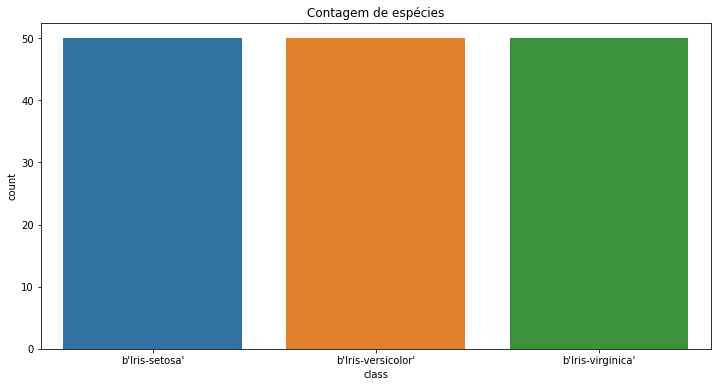

In [103]:
plt.figure(figsize=(12,6))
sns.countplot(df['class']).set_title('Contagem de espécies')
plt.show()

### Percebemos que as classes são balanceadas, não necessitando de alguma técnica de balanceamento durante o machine learning

## Relação em largura e comprimento de pétalas e sépalas por espécie

Text(0.5, 1.0, 'Espécies por tamanho de sépala')

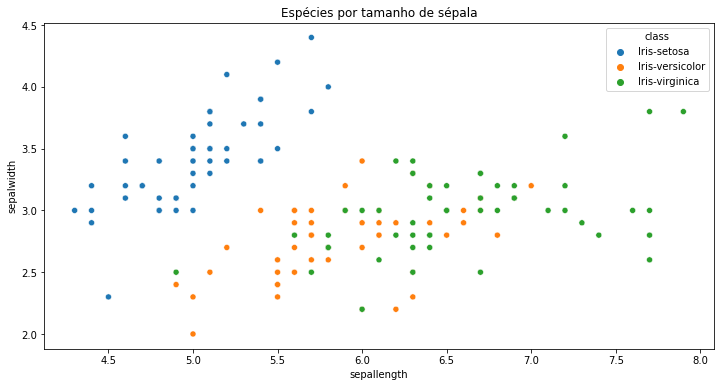

In [71]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="sepallength", y="sepalwidth", hue = 'class').set_title("Espécies por tamanho de sépala")

Text(0.5, 1.0, 'Espécies por tamanho de pétala')

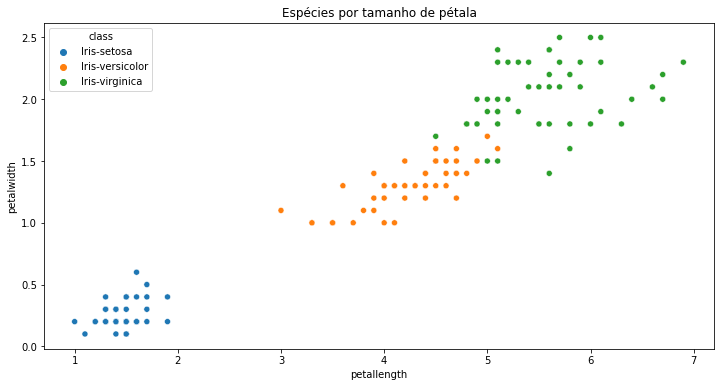

In [72]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="petallength", y="petalwidth", hue = 'class').set_title("Espécies por tamanho de pétala")

## Resumindo as relações usando pairplot

<Figure size 864x432 with 0 Axes>

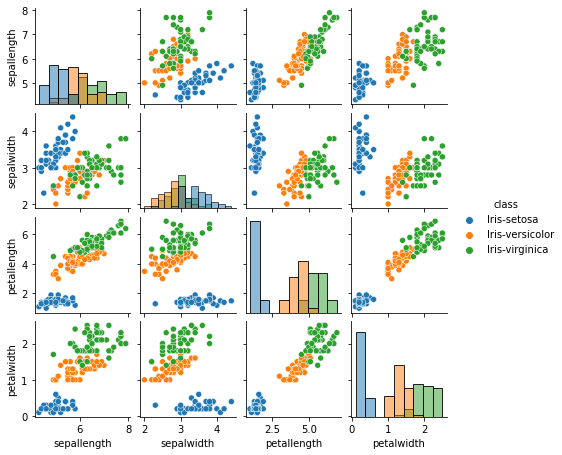

In [77]:
plt.figure(figsize=(12,6))
sns.pairplot(df.loc[:, df.columns != 'target'], hue="class", diag_kind="hist", size=1.6)

### Com esses gráficos de dispersão, é possível claramente observar que as espécies possuem diferenças evidenciadas pelo tamanho das pétalas e sépalas, também é notável a ausência de outliers, aparentemente.

## Mostrando a distribuição das sépalas e pétalas em relação a cada espécie

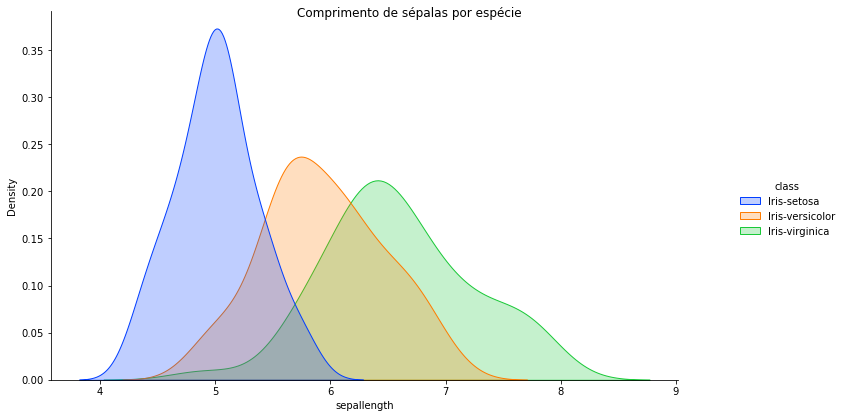

In [23]:
plot = sns.displot(data=df, x='sepallength', hue='class', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
plot.fig.set_figwidth(12)
plot.fig.set_figheight(6)
plot.fig.suptitle('Comprimento de sépalas por espécie')

plt.show()

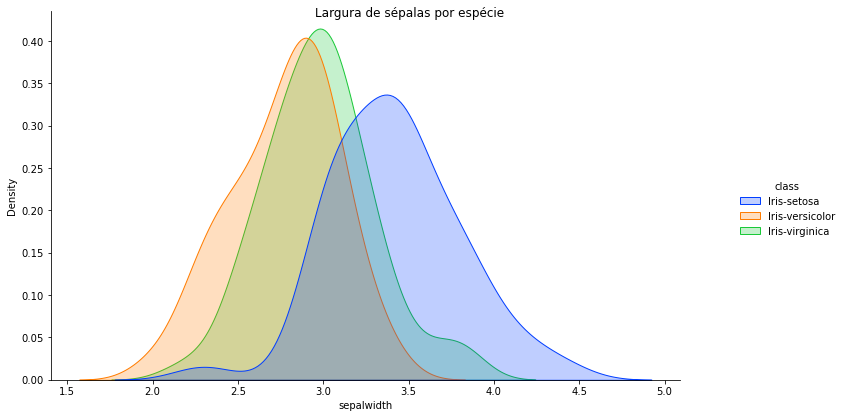

In [24]:
plot = sns.displot(data=df, x='sepalwidth', hue='class', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
plot.fig.set_figwidth(12)
plot.fig.set_figheight(6)
plot.fig.suptitle('Largura de sépalas por espécie')

plt.show()

In [25]:
## Largura e comprimento de pétalas em relação às espécies

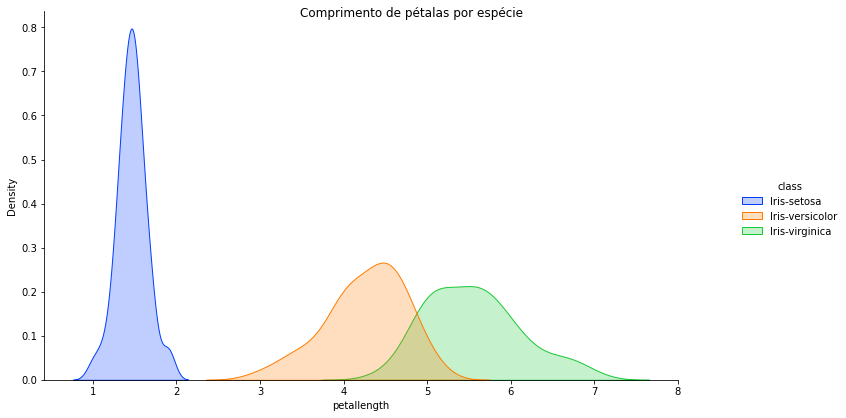

In [26]:
plot = sns.displot(data=df, x='petallength', hue='class', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
plot.fig.set_figwidth(12)
plot.fig.set_figheight(6)
plot.fig.suptitle('Comprimento de pétalas por espécie')

plt.show()

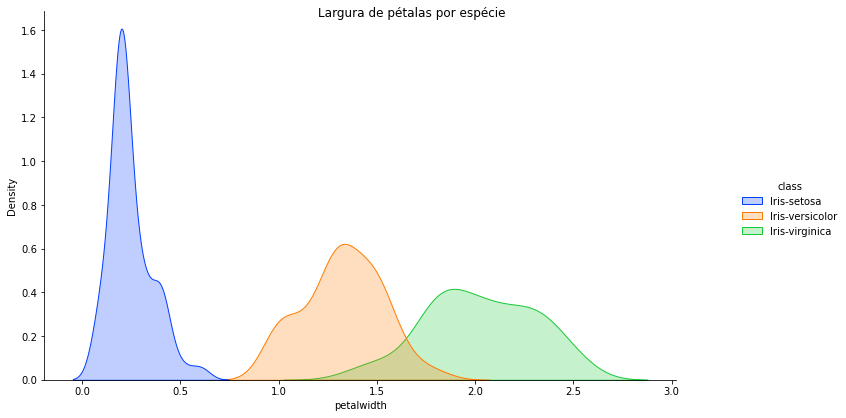

In [27]:
plot = sns.displot(data=df, x='petalwidth', hue='class', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
plot.fig.set_figwidth(12)
plot.fig.set_figheight(6)
plot.fig.suptitle('Largura de pétalas por espécie')

plt.show()

### Esses gráficos nos trazem insights interessantes sobre os tamanhos, exemplos:
### - A iris setosa apresenta, no geral, uma largura e altura de pétala bem menores que as outras espécies, e também com bem menos variação
### - A largura das sépalas entre as espécies são bem semelhantes, inclusive em sua dispersão

## Mapa de calor

<AxesSubplot:>

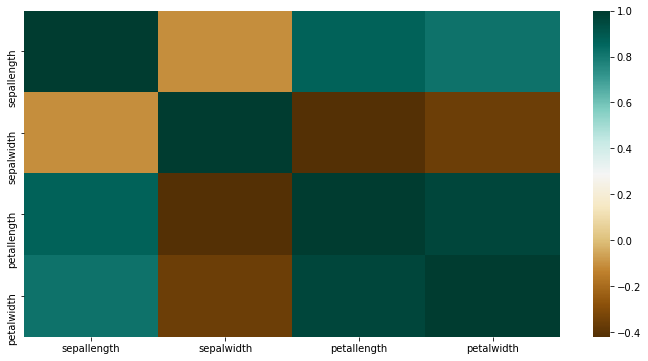

In [48]:


corr = df.loc[:, df.columns != 'class'].corr()

plt.figure(figsize=(12,6))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap='BrBG')

### No mapa de calor, achei o mais interessante as correlações negativas, como a entre as larguras das sépalas e os comprimentos das pétalas

# PCA

# Usando PCA para mostrar os dados em um espaço 2D

In [59]:
label_encoder = LabelEncoder()
x = df.loc[:, df.columns == 'class']
df['target'] = y = label_encoder.fit_transform(x)


X = df.loc[:, df.columns != 'class'].values
y = df['target'].values
target_names = df.loc[:, df.columns == 'class'].values

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

Text(0.5, 1.0, 'PCA of IRIS dataset')

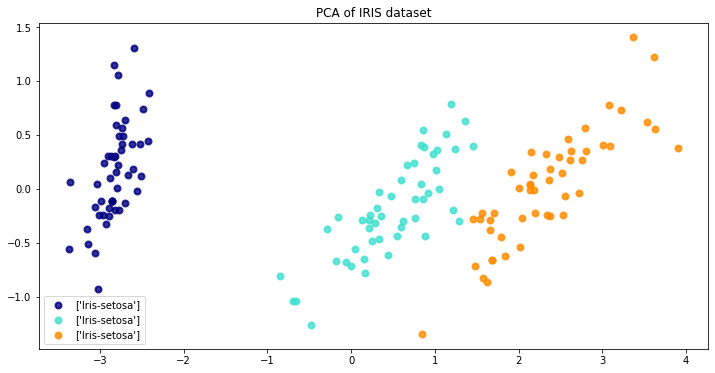

In [63]:

colors = ["navy", "turquoise", "darkorange"]
lw = 2

plt.figure(figsize=(12,6))

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

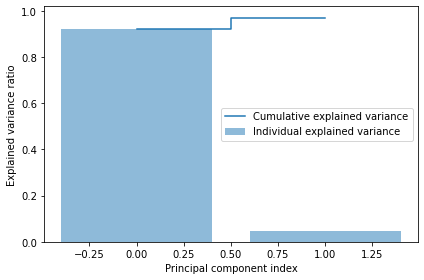

In [66]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Com o PCA, podemos observar a grande maioria da informação pode ser representada em 2 dimensões, e isso fico mais evidente ainda no gráfico de dispersão.

## Usando Kmeans para agrupar os dados

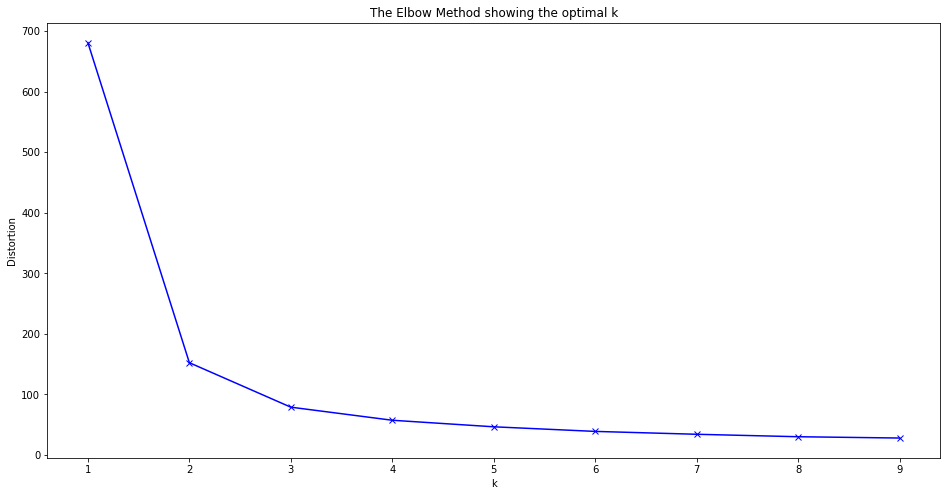

In [84]:
kmeans_data = df.copy()
del kmeans_data['class']
del kmeans_data['target']

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(kmeans_data)
    distortions.append(kmeanModel.inertia_)
    
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### O número ótimo de clusters para o kmeans pelo método do cotovelo é 3

In [97]:
km = KMeans(n_clusters=3)
km.fit(kmeans_data)

kmeans_data['cluster']=km.predict(kmeans_data)

kmeans_data.head()

,sepallength,sepalwidth,petallength,petalwidth,cluster
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


## Comparando os resultados do real e da saída do kmeans usando tamanhos de sépala e pétala

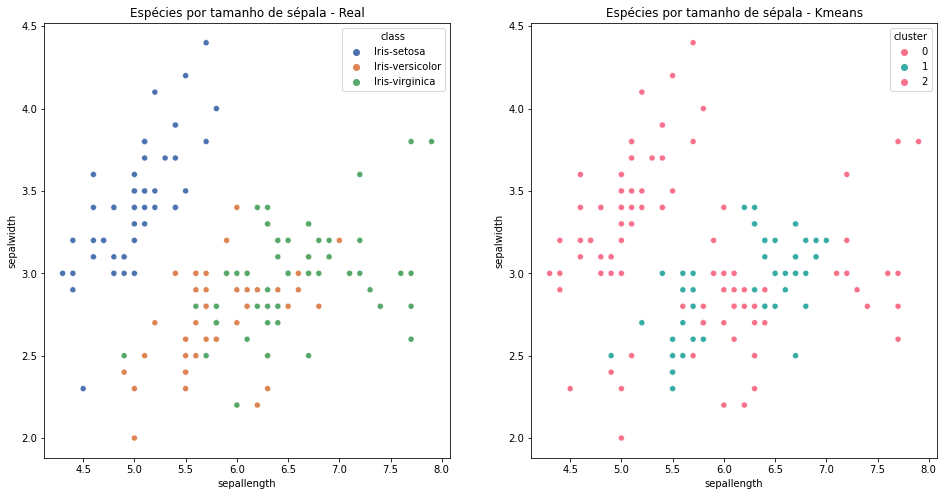

In [100]:
fig, ax =plt.subplots(1,2, figsize=(16,8))
sns.scatterplot(data=df, x="sepallength", y="sepalwidth", hue = 'class', ax = ax[0], palette="deep").set_title("Espécies por tamanho de sépala - Real")
sns.scatterplot(data=kmeans_data, x="sepallength", y="sepalwidth", hue = 'cluster', ax = ax[1], palette="husl").set_title("Espécies por tamanho de sépala - Kmeans")
fig.show()


### Observamos uma grande semelhança entre a separação resultante do kmeans e a separação real das espécies, mostrando que o algoritmo teve uma boa generalização para o problema.